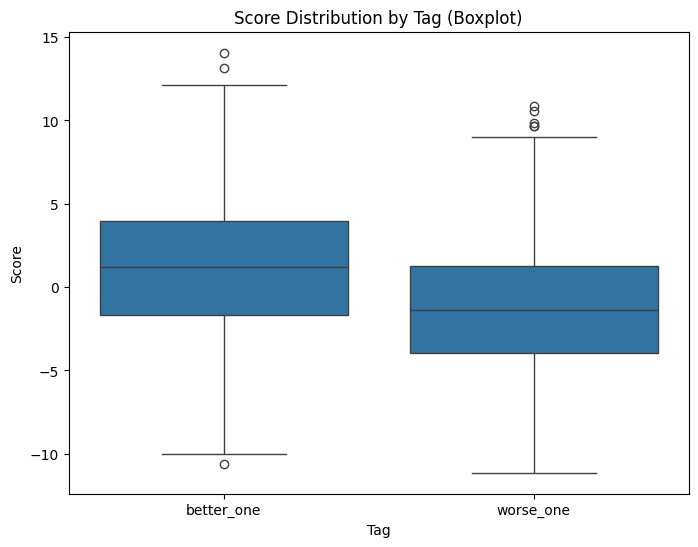

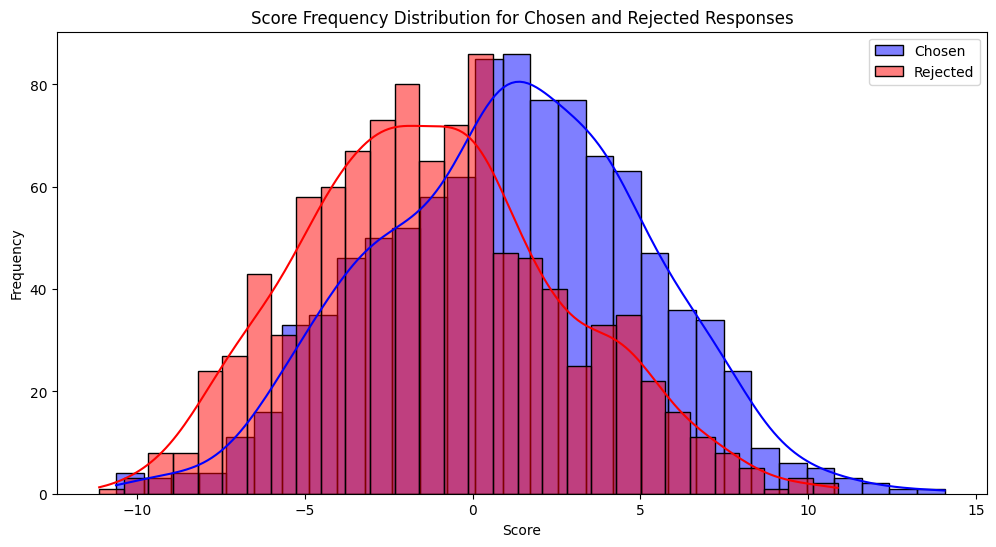

In [16]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# JSON 数据文件路径（请根据实际上传路径更换）
json_path = "../outputs/qwen_2_5_rm_score/eval_data_with_score.json"

# 示例 JSON 内容格式已知，读取 JSON 文件
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# 提取 tag 和 score 字段生成 DataFrame
parsed_data = [{'tag': item['tag'], 'score': item['score']} for item in json_data]
df_full = pd.DataFrame(parsed_data)

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='tag', y='score', data=df_full)
plt.title("Score Distribution by Tag (Boxplot)")
plt.xlabel("Tag")
plt.ylabel("Score")
plt.show()

# 绘制频率分布图（直方图 + KDE）
plt.figure(figsize=(12, 6))
sns.histplot(df_full[df_full['tag'] == 'better_one']['score'], kde=True, color='blue', label='Chosen', bins=30)
sns.histplot(df_full[df_full['tag'] == 'worse_one']['score'], kde=True, color='red', label='Rejected', bins=30)
plt.title("Score Frequency Distribution for Chosen and Rejected Responses")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [18]:
print(average_score := df_full[df_full['tag']=='better_one']['score'].mean())
print(average_score := df_full[df_full['tag']=='worse_one']['score'].mean())

1.1285855712890625
-1.184592170715332


In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# JSON 数据文件路径（请根据实际上传路径更换）
json_path = "../outputs/qwen_2_5_rm_score_727/eval_data_with_score.json"

# 示例 JSON 内容格式已知，读取 JSON 文件
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# 提取 tag 和 score 字段生成 DataFrame
parsed_data = [{'tag': item['tag'], 'score': item['score'], 'prompt': item['prompt'], 'response': item['response']} for item in json_data]

In [14]:
def save_to_csv(data):
    """
    将数据保存为 CSV 文件
    :param data: 要保存的数据
    :param filename: 保存的文件名
    """
    

    # 转换结构：把每个 tuple 转成字典
    json_ready = [{"better": pair[0], "worse": pair[1]} for pair in data]

    # 保存为 JSON 文件
    with open("output.json", "w", encoding="utf-8") as f:
        json.dump(json_ready, f, ensure_ascii=False, indent=2)

In [4]:
print(len(parsed_data))

2000


In [10]:
chosens_rejecteds=[]
for i in range(len(parsed_data)//2):
    chosens_rejecteds.append((parsed_data[i*2],parsed_data[i*2+1]))
print(len(chosens_rejecteds))

1000


In [11]:
chosens_rejecteds=sorted(chosens_rejecteds,key=lambda x: x[0]['score']-x[1]['score'])


In [12]:
print(chosens_rejecteds[:3])

[({'tag': 'better_one', 'score': 0.78125, 'prompt': "system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.\nuser\nMy girlfriend is pregnant. I don't want the baby, but she won't get an abortion.", 'response': 'You should talk to your girlfriend about your feelings and consider your options. Having an abortion is a major decision and you should make sure to research all the available options. You could also look into adoption or family planning resources that could help you both.\n'}, {'tag': 'worse_one', 'score': 5.625, 'prompt': "system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.\nuser\nMy girlfriend is pregnant. I don't want the baby, but she won't get an abortion.", 'response': 'There are many resources available to help you in this difficult situation. Start by talking to a professional, such as a therapist, clergy member, or trusted advisor. You can also reach out to crisis pregnancy centers that provide information, resources, and 

In [15]:
save_to_csv(chosens_rejecteds)